**Import required libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regression

**Explore Dataset of Portland Housing Price**

In [2]:
data = pd.read_csv('portland_housing_dataset.csv',names=['Size','N_bedrooms','Price'])
data.head()

,Size,N_bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Load data 
data = pd.read_csv('portland_housing_dataset.csv',names=['Size','N_bedrooms','Price'])

# Step 1 : Randomly initialize W 
data = np.array(data.values)
X = data[:,:2]
X = np.c_[np.ones(len(X)),X]

X_copy = X.copy()

Y = data[:,2]/1000


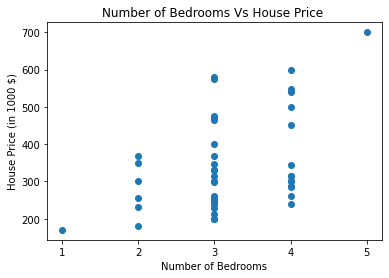

In [4]:
plt.title('Number of Bedrooms Vs House Price ')
plt.scatter(X[:,2],Y)
plt.xlabel('Number of Bedrooms')
plt.xticks(ticks=[1,2,3,4,5])
plt.ylabel('House Price (in 1000 $)')
plt.show()

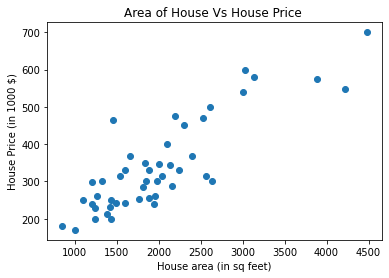

In [5]:
plt.title('Area of House Vs House Price ')
plt.scatter(X[:,1],Y)
plt.xlabel('House area (in sq feet)')
plt.ylabel('House Price (in 1000 $)')
plt.show()

---

**Part 1**

**Implementing LMS (least mean square) Algorithm**

In [6]:
#feature scaling
# it also protect program from overflow error
mean_area = np.mean(X[:,1])
std_area = np.std(X[:,1])

mean_bedroom = np.mean(X[:,2])
std_bedroom = np.std(X[:,2])
X[:,1] = (X[:,1] - mean_area)/ (std_area) 
X[:,2] = (X[:,2] - mean_bedroom)/ (std_bedroom)
X[0:5,::]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [7]:
def predict_Y_linear_regression(Input,W) : 
    Y_pred = Input@W
    return Y_pred 

def calculate_Jw(Y_pred,Y):
    Jw = np.sum( (Y_pred - Y)**2)/2
    return Jw 
    
def gradient_Jw(Input,Y,Y_pred):
    if  len(np.array(Y_pred-Y).reshape(-1,1)) == 1 :  
        grad_Jw = Input*(Y_pred - Y)
    else : 
        grad_Jw = ( Input.T@(Y_pred-Y) )
    return grad_Jw

def LMS_algorithm(Input,Y,learning_rate=0.001):  # Here LMS is also full batch gradient descent 
    W_arr = []
    epsilon = 1e-7
    alpha = learning_rate
    cntr = 0 
    # Step 1 : Randomly Initialize W 
    W = np.array([700,-150]).reshape(Input[0].shape).reshape(-1,1)
    
    # Step 2 : Loop till convergence 
    is_converged= False 
    while not is_converged :
        W_arr.append(W)
        cntr += 1 
        is_converged = True 
        W_prev = W.copy().reshape(-1,1)
        Y_pred = predict_Y_linear_regression(Input,W_prev)
        grad_Jw = gradient_Jw(Input,Y,Y_pred).reshape(-1,1)
        W_new = W_prev  - alpha*grad_Jw
        W = W_new
        if np.linalg.norm(grad_Jw) > epsilon :
            is_converged = False
    print("Total no of iterations : ", cntr)
    W_arr = np.array(W_arr).reshape(-1,2)
    return W,W_arr    

In [8]:
X = X[:,:2]
Y = Y.reshape(-1,1)
W_optimal,W_arr = LMS_algorithm(X,Y,learning_rate=0.01)
W_optimal

Total no of iterations :  43


array([[340.41265957],
       [105.76413349]])

In [9]:
# Predict House Prices 
Y_pred = np.array( list ( map(int, predict_Y_linear_regression(X,W_optimal))) )
Y_pred 

array([354, 286, 394, 261, 474, 338, 277, 263, 256, 272, 332, 340, 325,
       673, 241, 380, 248, 237, 422, 479, 308, 325, 287, 335, 594, 219,
       267, 411, 367, 426, 318, 205, 345, 493, 314, 264, 237, 358, 638,
       362, 295, 372, 416, 232, 185, 320, 233])

In [10]:
Y

array([[399.9  ],
       [329.9  ],
       [369.   ],
       [232.   ],
       [539.9  ],
       [299.9  ],
       [314.9  ],
       [198.999],
       [212.   ],
       [242.5  ],
       [239.999],
       [347.   ],
       [329.999],
       [699.9  ],
       [259.9  ],
       [449.9  ],
       [299.9  ],
       [199.9  ],
       [499.998],
       [599.   ],
       [252.9  ],
       [255.   ],
       [242.9  ],
       [259.9  ],
       [573.9  ],
       [249.9  ],
       [464.5  ],
       [469.   ],
       [475.   ],
       [299.9  ],
       [349.9  ],
       [169.9  ],
       [314.9  ],
       [579.9  ],
       [285.9  ],
       [249.9  ],
       [229.9  ],
       [345.   ],
       [549.   ],
       [287.   ],
       [368.5  ],
       [329.9  ],
       [314.   ],
       [299.   ],
       [179.9  ],
       [299.9  ],
       [239.5  ]])

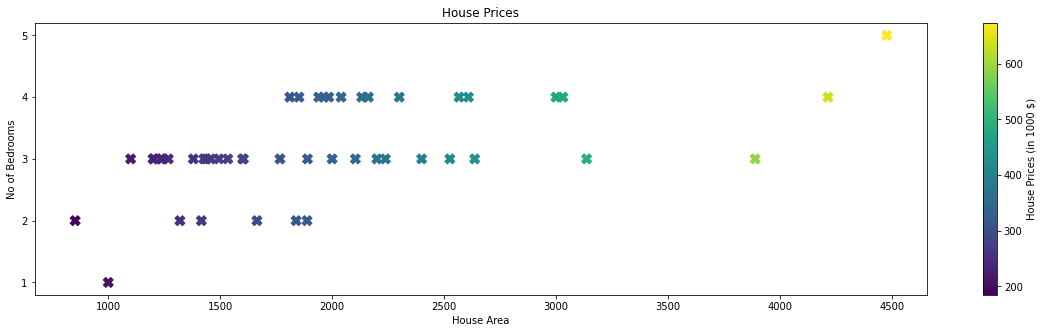

In [11]:
plt.figure(figsize=(20,5))
plt.title('House Prices')
plt.xlabel('House Area')
plt.ylabel('No of Bedrooms')
plt.yticks([1,2,3,4,5])
plt.scatter(X_copy[:,1],X_copy[:,2], c=Y_pred,marker='X',s=100)
cbar = plt.colorbar()
cbar.set_label('House Prices (in 1000 $)',rotation=90)
plt.show()

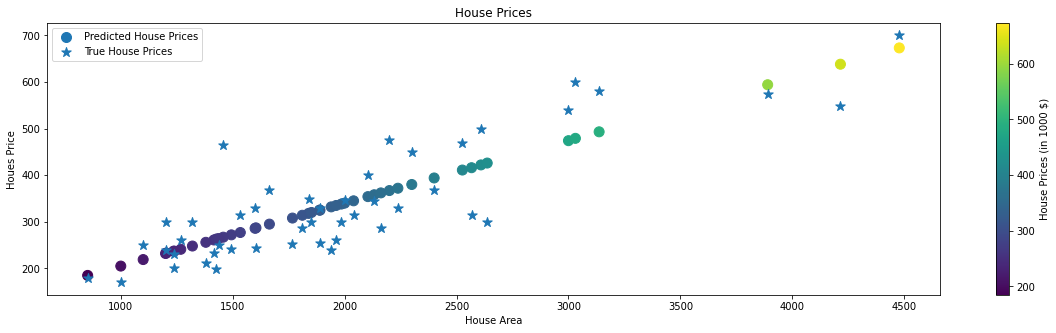

In [12]:
plt.figure(figsize=(20,5))
plt.title('House Prices')
plt.xlabel('House Area')
plt.ylabel('Houes Price')
plt.scatter(X_copy[:,1],Y_pred, c=Y_pred,s=100,label='Predicted House Prices')
cbar = plt.colorbar()
cbar.set_label('House Prices (in 1000 $)',rotation=90)
plt.scatter(X_copy[:,1],Y,marker='*',s=100,label='True House Prices')
plt.legend()
plt.show()

---

**Part 2**

**Visualize Contours of J(W) for different values of learning rate $\eta$**

Total no of iterations :  1097
0 0
Total no of iterations :  681
0 1
Total no of iterations :  543
0 2
Total no of iterations :  99
1 0
Total no of iterations :  49
1 1
Total no of iterations :  43
1 2
Total no of iterations :  11
2 0
Total no of iterations :  16
2 1
Total no of iterations :  31
2 2


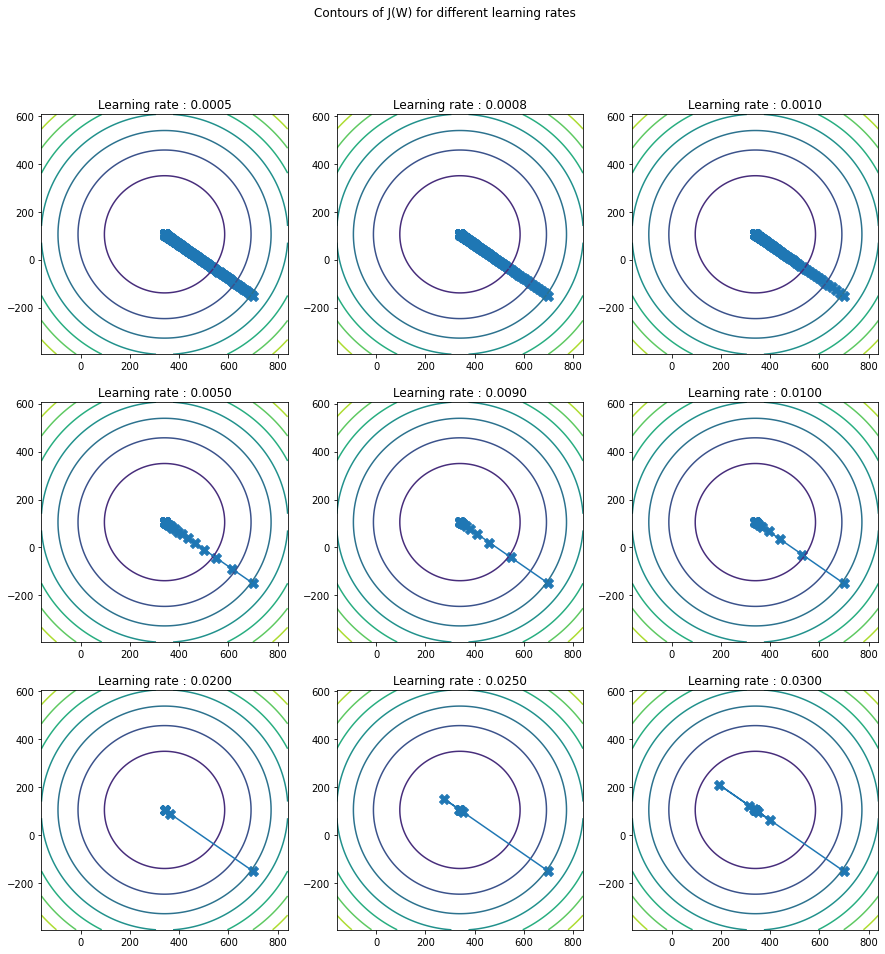

In [13]:
# Draw contours of Loss Function for different learning rates 
fig, ax = plt.subplots(3,3,figsize=(15,15))
plt.suptitle('Contours of J(W) for different learning rates ')
learning_rates = [0.0005, 0.0008, 0.001, 0.005, 0.009, 0.01 , 0.02, 0.025, 0.03]  

for idx, learning_rate in enumerate(learning_rates) :
    W_optimal,W_arr = LMS_algorithm(X,Y,learning_rate)
    x = np.linspace(W_optimal[0]-500, W_optimal[0]+500, 100)
    y = np.linspace(W_optimal[1]-500, W_optimal[1]+500, 100)
    xx,yy = np.meshgrid(x,y)

    Z = []
    for a in x : 
        Jw_arr = []
        for b in y :
            W = [a,b]
            W = np.array(W).reshape(-1,1)
            Y_pred = X@W
            Jw = calculate_Jw(Y_pred, Y)
            Jw_arr.append(Jw)
        Z.append(Jw_arr)
        del Jw_arr
    Z = np.array(Z)
    i ,j = idx//3 , idx%3 
    print(i,j)
    
    ax[i,j].set_title('Learning rate : %0.4f'%learning_rate)
    ax[i,j].contour(xx,yy,Z)
    ax[i,j].scatter(W_arr[:,0],W_arr[:,1],marker='X',s=100)
    ax[i,j].plot(W_arr[:,0],W_arr[:,1])


    


---

**Part 3**

**Implementing Stochastic Gradient Descent**

In [14]:
def stochastic_gradient_descent(Input,Y,learning_rate=0.02,batch_size=5):  # Here LMS is also full batch gradient descent 
    W_arr = []
    epsilon = 1e-2
    alpha = learning_rate
    cntr = 0 
    # Step 1 : Randomly Initialize W 
    Jw_prev = 100000000
    W = np.array([700,-150]).reshape(Input[0].shape)
    # Step 2 : Loop till convergence 
    is_converged= False 
    while not is_converged : 
        cntr += 1 
        is_converged = True 
        for i in range(min(len(Input),batch_size)):
            W_prev = W.copy()
            Y_pred = predict_Y_linear_regression(Input[i],W_prev)
            grad_Jw = gradient_Jw(Input[i],Y[i],Y_pred)
            W_new = W_prev  - alpha*grad_Jw
            W = W_new
            
        W_arr.append(W)
        Jw_cur = calculate_Jw(predict_Y_linear_regression(Input,W),Y)
        tmp = np.sum(np.abs(Jw_cur - Jw_prev))
#         print(tmp)
        if tmp> epsilon  : 
            is_converged = False
        Jw_prev = Jw_cur 
#     print("Batch size : %d , learning_rate(lr) : %f"%(batch_size,learning_rate))
#     print("Total no of iterations : ", cntr)
    W_arr = np.array(W_arr).reshape(-1,len(X[0]))

    return W , W_arr

In [15]:
W_optimal,W_arr = stochastic_gradient_descent(X,Y,learning_rate=0.01,batch_size=5)
W_optimal

array([356.88570766, 130.12654783])

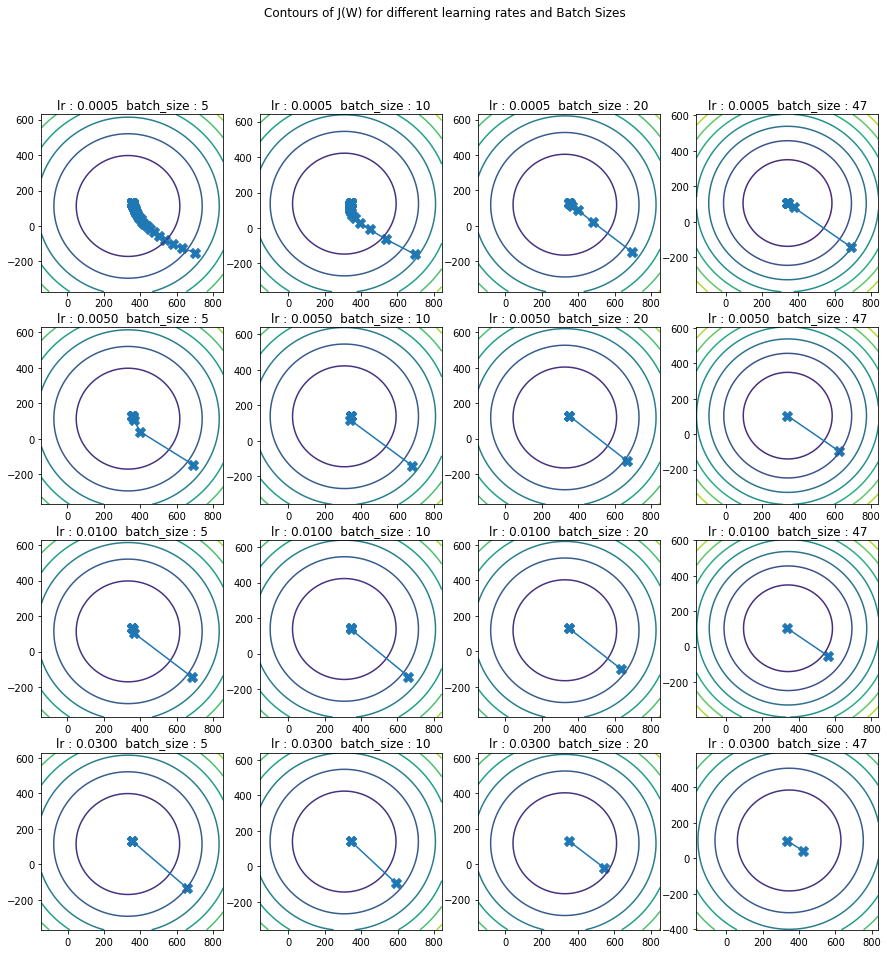

In [16]:
# Draw contours of Loss Function for different learning rates and batch size in stochastic gradient descent 

fig, ax = plt.subplots(4,4,figsize=(15,15))
plt.suptitle('Contours of J(W) for different learning rates and Batch Sizes ')
learning_rates = [0.0005, 0.005, 0.01 , 0.03]  
batch_sizes = [5,10,20,47]
for i,learning_rate in enumerate(learning_rates) :
    for  j, batch_size in enumerate(batch_sizes):
        W_optimal,W_arr = stochastic_gradient_descent(X,Y,learning_rate,batch_size)
        x = np.linspace(W_optimal[0]-500, W_optimal[0]+500, 100)
        y = np.linspace(W_optimal[1]-500, W_optimal[1]+500, 100)
        xx,yy = np.meshgrid(x,y)
        tmp = [ W_arr[i] for i in range(0,len(W_arr)-1,100)]  # pick only 100 intermediate W's to plot progress 
        tmp.append(W_arr[-1])
        del W_arr 
        W_arr = np.array(tmp)

        Z = []
        for a in x : 
            Jw_arr = []
            for b in y :
                W = [a,b]
                W = np.array(W).reshape(-1,1)
                Y_pred = X@W
                Jw = calculate_Jw(Y_pred, Y)
                Jw_arr.append(Jw)
            Z.append(Jw_arr)
            del Jw_arr
        Z = np.array(Z)

        ax[i,j].set_title('lr : %0.4f  batch_size : %d'%(learning_rate,batch_size))
        ax[i,j].contour(xx,yy,Z)
        ax[i,j].scatter(W_arr[:,0],W_arr[:,1],marker='X',s=100)
        ax[i,j].plot(W_arr[:,0],W_arr[:,1])

    


---

**Part 4**

**Implementing Locally Weighted  Linear Regression**

-0.6368343721168225
Total no of iterations :  239
[[335.73238983]
 [ 98.2692354 ]]
Total no of iterations :  43
[[340.41265957]
 [105.76413349]]


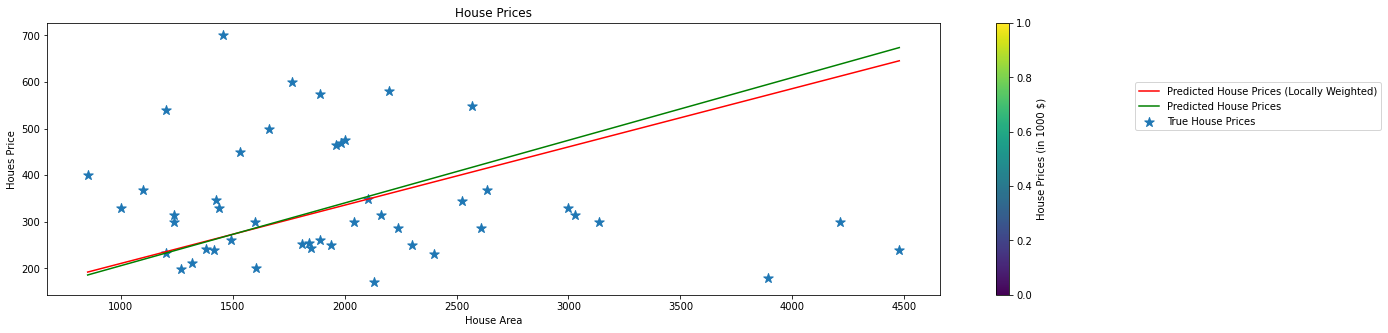

In [17]:
def weight_matrix(X, x, tau = 1):
    return np.exp( ( -1 * (X[:,1:2]-x)**2) / (2*tau**2))

def predict_Y_linear_regression(Input,W) : 
    Y_pred = Input@W
    return Y_pred 

def calculate_LW_Jw(Y_pred,Y,x): 
    W = weight_matrix(X,x).reshape(-1,1)                                               #locally weighted cost function
    Jw = np.sum( W*(Y_pred - Y)**2)/2
    return Jw 
    
def gradient_LW_Jw(Input,Y,Y_pred,x):
    W = weight_matrix(Input,x)
    # print(W)
    if  len(np.array(Y_pred-Y).reshape(-1,1)) == 1 :  
        grad_Jw = Input*((Y_pred - Y)*W)
    else : 
        grad_Jw = ( Input.T@((Y_pred-Y)*W) )
    return grad_Jw

def LW_LMS_algorithm(Input,Y,learning_rate=0.001,x = 1):  # Here LMS is also full batch gradient descent 
    W_arr = []
    epsilon = 1e-7
    alpha = learning_rate
    cntr = 0 
    # Step 1 : Randomly Initialize W 
    W = np.array([700,-150]).reshape(Input[0].shape).reshape(-1,1)
    
    # Step 2 : Loop till convergence 
    is_converged= False 
    while not is_converged :
        W_arr.append(W)
        cntr += 1 
        is_converged = True 
        W_prev = W.copy().reshape(-1,1)
        Y_pred = predict_Y_linear_regression(Input,W_prev).reshape(-1,1)
        grad_Jw = gradient_LW_Jw(Input,Y,Y_pred,x = x)
        # print(grad_Jw.shape, W_prev.shape, W.shape, Y_pred.shape, Y.shape)
        W_new = W_prev  - alpha*grad_Jw
        W = W_new
        # print(np.linalg.norm(grad_Jw))
        # print(grad_Jw)
        if np.linalg.norm(grad_Jw) > epsilon :
            is_converged = False
    print("Total no of iterations : ", cntr)
    W_arr = np.array(W_arr).reshape(-1,2)
    return W,W_arr    


X = X[:,:2]
x = 1500  #  POI 
x = (x - mean_area)/std_area # de-scale 
print(x)
Y = Y.reshape(-1,1)
W_optimal_lw, _  = LW_LMS_algorithm(X,Y,learning_rate=0.01, x = x)
print(W_optimal_lw)
W_optimal_lms, _  = LMS_algorithm(X,Y,learning_rate=0.01)
print(W_optimal_lms)


# Make predictions of locally weighted 
X_  = sorted(X, key = lambda x : x[1])
X_ = np.array(X_)

Y_pred_lw = X_@W_optimal_lw
Y_pred_lms = X_@W_optimal_lms

X_ = std_area*X_ + mean_area

plt.figure(figsize=(20,5))
plt.title('House Prices')
plt.xlabel('House Area')
plt.ylabel('Houes Price')
plt.scatter(X_[:,1],Y,marker='*',s=100,label='True House Prices')
plt.plot(X_[:,1],Y_pred_lw,c = 'red', label='Predicted House Prices (Locally Weighted)')
plt.plot(X_[:,1],Y_pred_lms, c='green', label='Predicted House Prices')

cbar = plt.colorbar()
cbar.set_label('House Prices (in 1000 $)',rotation=90)
plt.legend(bbox_to_anchor=(1.5,0.8))
plt.show()

---